In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

In [40]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) +  # total_words : number of classes 

print(len(data))
print(tokenizer.word_index)
print(total_words)


68953
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home':

In [47]:
for line in corpus: 
  token_list = tokenizer.texts_to_sequences([line])[0]# index [0] removes extra brackets
  print(token_list)

[51, 12, 96, 1217, 48, 2, 69]
[2, 11, 15, 31, 361, 8, 24, 1218]
[272, 798, 2, 204, 24, 579, 69]
[118, 35, 119, 799, 56, 24, 184]
[10, 184, 25, 23, 5, 580, 456]
[2, 184, 800, 12, 801, 4, 7, 235]
[1219, 17, 12, 75, 1220, 236, 17, 12, 75, 802]
[184, 800, 12, 801, 4, 7, 235]
[152, 3, 2, 5, 803, 6, 184]
[3, 362, 25, 49, 83, 457]
[52, 108, 5, 1221, 804]
[106, 805, 4, 806, 7, 164]
[2, 309, 7, 803, 6, 184, 56]
[1, 804, 141, 4, 9, 5, 102]
[5, 102, 15, 49, 83, 457]
[33, 141, 25, 4, 9, 4, 204, 9, 1222]
[6, 21, 33, 309, 7, 184, 56]
[458, 7, 581, 2, 363, 1223, 142]
[12, 88, 1, 65]
[1224, 807, 310, 26, 808, 142]
[364, 1, 809, 459, 31, 1225]
[311, 2, 1226, 8, 582, 583]
[3, 7, 460, 1227, 810]
[109, 1, 165, 18, 584, 23, 810]
[109, 1, 461, 153, 23, 583]
[92, 185, 811, 585, 812]
[1228, 6, 154, 1229]
[1230, 5, 365, 2, 1231, 813]
[273, 3, 814, 5, 586, 312]
[7, 74, 366, 120, 587, 186, 143]
[205, 48, 367, 368, 23, 84]
[369, 7, 1232, 6, 22, 120, 1233]
[274, 1, 815, 6, 7, 313]
[1234, 5, 1235, 588, 23, 462]
[37

In [46]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] # extracts senquence
  # For each token list (phrase), store n_grams of phrase to generate training data
	for i in range(1, len(token_list)):
   # First time, i=1, but first n_gram will store 2 sequences
   # Last tme
		n_gram_sequence = token_list[:i+1] # n_gram_Sequences reflect phrases < 16 tokens
		input_sequences.append(n_gram_sequence)

In [35]:
input_sequences.shape

(12038, 16)

In [51]:
input_sequences[0:10]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361]]

In [25]:
print(len(input_sequences))

12038


In [53]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print("Biggest sequence length: ",max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print("Filling with zeros in case of smaller sequences with max shape: ",input_sequences.shape)

Biggest sequence length:  16
Filling with zeros in case of smaller sequences with max size:  (12038, 16)


In [58]:
input_sequences[0:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   51,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   51,   12,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   51,   12,   96, 1217],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          51,   12,   96, 1217,   48],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
          12,   96, 1217,   48,    2]], dtype=int32)

In [61]:
input_sequences[:,:-1] # Take everything except the last digit

array([[  0,   0,   0, ...,   0,   0,  51],
       [  0,   0,   0, ...,   0,  51,  12],
       [  0,   0,   0, ...,  51,  12,  96],
       ...,
       [  0,   0,   0, ...,   0,   0,  47],
       [  0,   0,   0, ...,   0,  47, 105],
       [  0,   0,   0, ...,  47, 105, 138]], dtype=int32)

In [62]:
input_sequences[:,-1] # take the last digit as label

array([  12,   96, 1217, ...,  105,  138,  184], dtype=int32)

In [69]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print(xs.shape)
print(labels.shape)
print(ys.shape)
print(ys[0:5])

(12038, 15)
(12038,)
(12038, 2690)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [70]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [71]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [72]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [73]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [74]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
377/377 [==============================] - 11s 19ms/step - loss: 6.6555 - accuracy: 0.0713
Epoch 2/10
377/377 [==============================] - 7s 20ms/step - loss: 5.7952 - accuracy: 0.1120
Epoch 3/10
377/377 [==============================] - 7s 19ms/step - loss: 4.9467 - accuracy: 0.1598
Epoch 4/10
377/377 [==============================] - 7s 19ms/step - loss: 4.0088 - accuracy: 0.2299
Epoch 5/10
377/377 [==============================] - 7s 19ms/step - loss: 3.1593 - accuracy: 0.3340
Epoch 6/10
377/377 [==============================] - 7s 19ms/step - loss: 2.4660 - accuracy: 0.4427
Epoch 7/10
377/377 [==============================] - 7s 19ms/step - loss: 1.9764 - accuracy: 0.5394
Epoch 8/10
377/377 [==============================] - 7s 19ms/step - loss: 1.6433 - accuracy: 0.6119
Epoch 9/10
377/377 [==============================] - 7s 19ms/step - loss: 1.4015 - accuracy: 0.6641
Epoch 10/10
377/377 [==============================] - 7s 19ms/step - loss: 1.1967 - accur

In [76]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

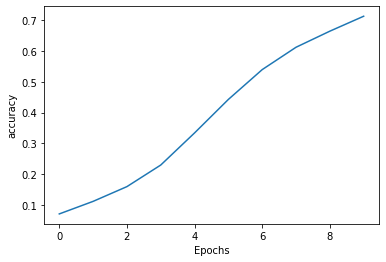

In [77]:
plot_graphs(history, 'accuracy')


In [79]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this proud as gentle as any lily round the love love gone your eyes sailing love down down down love love so fair and kind generation over the blue sea may morning early and i did meet my love gone love gone and love loved me and me and me away my days in endless roaming and i hear at night i might love in my love and love my love and i love you back away from my love and i did meet in me and i asked them mind to draw and work for a ball i was going
